<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MachineLearning/blob/main/Tarea2_CarolinaHerreraAzolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instrucciones


- Tipo de actividad: Individual
- Tipo de evaluación: Sumativa (con calificación)
- Ponderación: 10% (Equivale al 10% de la nota final del curso)
- Puntaje: 30 puntos

1. Antes de comenzar, debes haber revisado todo el material de los módulos 1 y 2 del curso.

2. Descarga el siguiente archivo Jupyter Notebook (base_tarea2), que servirá de base para realizar la tarea. En él podrás encontrar dos celdas de código. La primera consiste en la declaración de una función que genera espirales en un espacio bidimensional. La segunda celda crea un conjunto de datos de referencia con 4 espirales con ciertas características particulares, donde cada una corresponde a una categoría diferente.
3. Como primera actividad de la tarea deberás dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, utilizando la función train_test_split de sklearn, con una proporción adecuada para cada uno, dado el tamaño del conjunto de datos.

4. Entrena al menos 3 modelos basados en las técnicas cubiertas en el módulo 2 del curso. Para cada una, obtenga su rendimiento en los conjuntos de entrenamiento y prueba y comente sobre el nivel de sobreajuste exhibido, en función de la comparación entre modelos.

5. Visualiza las superficies de decisión de cada uno de los modelos entrenados, utilizando el esquema presentado en los tutoriales, e identifique los sectores del espacio de características donde se aprecie sobreajuste. Comente sobre las características de estos sectores para cada modelo.

6. Realiza un análisis de sensibilidad de los modelos con respecto a las características de los datos. Para esto, modifique el conjunto de datos utilizando los parámetros que recibe la función que genera espirales. Específicamente, estudie el efecto del ruido y de la forma de las espirales.

In [ ]:
import numpy as np
from numpy import pi

def generate_spiral(a, b, N, noise_factor=0):

    theta = np.sqrt(np.random.rand(N))*4*pi
    r = a + b*theta
    x = np.array([np.cos(theta)*r, np.sin(theta)*r]).T
    x += np.expand_dims(noise_factor*r,1)*np.random.randn(N,2)
    return x

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

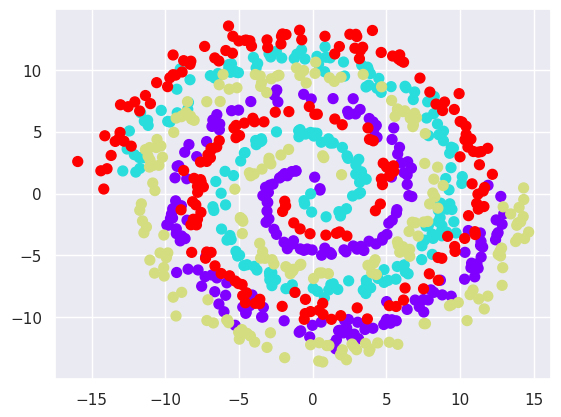

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

N = 200
a = 1.75
b = 1
noise_factor = 0.05

x1 = generate_spiral(0,b,N,noise_factor)
x2 = generate_spiral(0,-b,N,noise_factor)
x3 = generate_spiral(a,b,N,noise_factor)
x4 = generate_spiral(-a,-b,N,noise_factor)

X = np.concatenate((x1,x2,x3,x4),axis=0)
Y = np.ravel(np.concatenate((np.zeros((N,1)),np.ones((N,1)),2*np.ones((N,1)),3*np.ones((N,1))), axis=0))


plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow');
plt


**Resolución Pregunta 3.** Como primera actividad de la tarea deberás dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, utilizando la función train_test_split de sklearn, con una proporción adecuada para cada uno, dado el tamaño del conjunto de datos.

In [ ]:
# Incorporación de librerías
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# División de datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Visualizar el tamaño de cada conjunto
print("Conjunto para datos de entrenamiento:", X_train.shape)
print("Conjunto para datos de prueba:", X_test.shape)

Conjunto para datos de entrenamiento: (560, 2)
Conjunto para datos de prueba: (240, 2)


**Resolución Pregunta 4. **. Entrena al menos 3 modelos basados en las técnicas cubiertas en el módulo 2 del curso. Para cada una, obtenga su rendimiento en los conjuntos de entrenamiento y prueba y comente sobre el nivel de sobreajuste exhibido, en función de la comparación entre modelos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Creación de los modelos
arbolDecision = DecisionTreeClassifier(random_state=42)
randomForest = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Entrenamiento de los modelos
arbolDecision.fit(X_train, Y_train)
randomForest.fit(X_train, Y_train)
bagging.fit(X_train, Y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
# Modelos en conjunto de entrenamiento
train_acc_tree = accuracy_score(Y_train, arbolDecision.predict(X_train))
train_acc_rf = accuracy_score(Y_train, randomForest.predict(X_train))
train_acc_bagging = accuracy_score(Y_train, bagging.predict(X_train))

# Modelos en conjunto de prueba
test_acc_tree = accuracy_score(Y_test, arbolDecision.predict(X_test))
test_acc_rf = accuracy_score(Y_test, randomForest.predict(X_test))
test_acc_bagging = accuracy_score(Y_test, bagging.predict(X_test))

# Resultados
print("Árbol de Decisión - Precisión entrenamiento:", train_acc_tree, "Precisión prueba:", test_acc_tree)
print("Random Forest - Precisión entrenamiento:", train_acc_rf, "Precisión prueba:", test_acc_rf)
print("Bagging - Precisión entrenamiento:", train_acc_bagging, "Precisión prueba:", test_acc_bagging)


Árbol de Decisión - Precisión entrenamiento: 1.0 Precisión prueba: 0.7458333333333333
Random Forest - Precisión entrenamiento: 1.0 Precisión prueba: 0.775
Bagging - Precisión entrenamiento: 0.9892857142857143 Precisión prueba: 0.7666666666666667


**Respuesta P4: **
Del anterior código desprendemos la siguiente información:

- Árbol de Decisión - Precisión en entrenamiento: 1.0; Precisión en prueba: 0.7041666666666667. Esto nos indica que el modelo fue afectado por el sobreajuste: se ajustó bien a los datos de entrenamiento, pero no logró generalizar adecuadamente en los datos nuevos.
- Random Forest - Precisión en entrenamiento: 1.0; Precisión en prueba: 0.7708333333333334. Este modelo muestra un mejor rendimiento en el conjunto de prueba, lo que revela que es menos propenso al sobreajuste en comparación con el árbol de decisión. Esto se debe a que el factor de aleatoriedad permite combinar muchos árboles, encontrando una solución que se ajusta de mejor manera a los datos de prueba.
- Bagging - Precisión en entrenamiento: 0.9875; Precisión en prueba: 0.7416666666666667. Podemos notar que la precisión en prueba es muy levemente menor a la del Random Forest, y también presenta una reducción del sobreajuste en comparación con el árbol de decisión.





**Resolución P5: **

5. Visualiza las superficies de decisión de cada uno de los modelos entrenados, utilizando el esquema presentado en los tutoriales, e identifique los sectores del espacio de características donde se aprecie sobreajuste. Comente sobre las características de estos sectores para cada modelo.

In [ ]:
def plot_decision_surface(model, X, Y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_background = plt.get_cmap('rainbow')

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow', edgecolor='k')
    plt.title(title)
    plt.show()


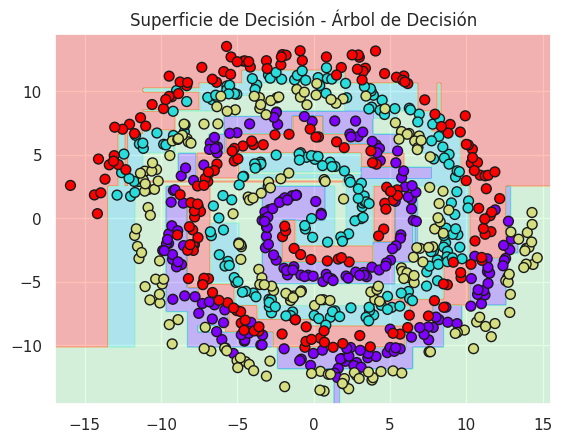

In [ ]:
# Superficie de decisión para Árbol de Decisión
plot_decision_surface(arbolDecision, X, Y, title="Superficie de Decisión - Árbol de Decisión")

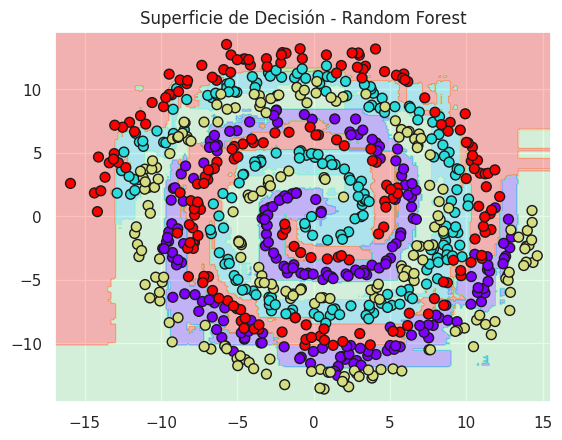

In [ ]:
# Superficie de decisión para Random Forest
plot_decision_surface(randomForest, X, Y, title="Superficie de Decisión - Random Forest")

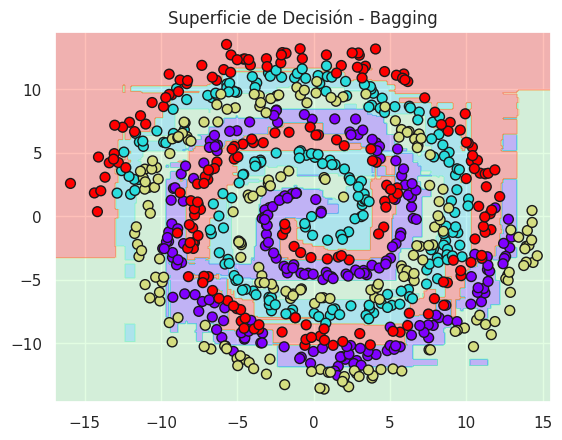

In [ ]:
# Superficie de decisión para Bagging
plot_decision_surface(bagging, X, Y, title="Superficie de Decisión - Bagging")

*Respuesta P5:*


- Árbol de Decisión
En la imagen generada por el modelo de Árbol de Decisión, podemos observar una serie de divisiones en forma de rectángulos que se distribuyen de manera fragmentada a lo largo del espacio de características. Esto indica un alto nivel de sobreajuste, ya que las divisiones siguen patrones muy específicos de los datos de entrenamiento. Este ajuste excesivo reduce la capacidad de generalización del modelo, dificultando su rendimiento en datos nuevos.
- Random Forest
En el caso del modelo Random Forest, la superficie de decisión es menos fragmentada y las divisiones son menos detalladas, con un aspecto más uniforme. Esto se debe a la reducción del sobreajuste que ofrece el Random Forest al combinar múltiples árboles y alcanzar un consenso mediante el promedio de sus predicciones. Así, las regiones de decisión son más amplias y permiten una mejor generalización.
- Bagging
La imagen del modelo Bagging muestra un comportamiento similar al de Random Forest, con una superficie de decisión más suave en comparación con un Árbol de Decisión individual. Sin embargo, la suavidad de las divisiones puede variar según la cantidad de árboles de decisión utilizados en el ensamble. En términos de sobreajuste, Bagging también muestra una reducción significativa en comparación con el Árbol de Decisión, generando regiones de decisión que no son tan específicas y permitiendo una mayor generalización.


6. Resolución Pregunta 6: Realiza un análisis de sensibilidad de los modelos con respecto a las características de los datos. Para esto, modifique el conjunto de datos utilizando los parámetros que recibe la función que genera espirales. Específicamente, estudie el efecto del ruido y de la forma de las espirales.

In [ ]:
from sklearn.metrics import accuracy_score

def evaluar_modelos(noise=0.05, a=1.75, b=1):

    x1 = generate_spiral(0, b, N, noise)
    x2 = generate_spiral(0, -b, N, noise)
    x3 = generate_spiral(a, b, N, noise)
    x4 = generate_spiral(-a, -b, N, noise)

    # Crear el conjunto de datos
    X_mod = np.concatenate((x1, x2, x3, x4), axis=0)
    Y_mod = np.ravel(np.concatenate((np.zeros((N,1)), np.ones((N,1)), 2*np.ones((N,1)), 3*np.ones((N,1))), axis=0))
    X_train, X_test, Y_train, Y_test = train_test_split(X_mod, Y_mod, test_size=0.3, random_state=42)

    # División entre entramiento y evaluación de cada modelo
    arbolDecision.fit(X_train, Y_train)
    randomForest.fit(X_train, Y_train)
    bagging.fit(X_train, Y_train)

    # Precisión para cada modelo
    acc_tree = accuracy_score(Y_test, arbolDecision.predict(X_test))
    acc_rf = accuracy_score(Y_test, randomForest.predict(X_test))
    acc_bagging = accuracy_score(Y_test, bagging.predict(X_test))

   #Exponemos
    print(f"Ruido: {noise}, a: {a}, b: {b}")
    print("Árbol de Decisión - Precisión:", acc_tree)
    print("Random Forest - Precisión:", acc_rf)
    print("Bagging - Precisión:", acc_bagging)
    print("\n")

# Análisis de sensibilidad al ruido
noise_levels = [0.1, 0.2, 0.3]
for noise in noise_levels:
    evaluar_modelos(noise=noise)

# Análisis de sensibilidad a la forma de las espirales
spiral_shapes = [(1, 1), (2, 1), (1.75, 0.5)]
for a_mod, b_mod in spiral_shapes:
    evaluar_modelos(a=a_mod, b=b_mod)


Ruido: 0.1, a: 1.75, b: 1
Árbol de Decisión - Precisión: 0.4875
Random Forest - Precisión: 0.5
Bagging - Precisión: 0.525


Ruido: 0.2, a: 1.75, b: 1
Árbol de Decisión - Precisión: 0.4125
Random Forest - Precisión: 0.4
Bagging - Precisión: 0.42083333333333334


Ruido: 0.3, a: 1.75, b: 1
Árbol de Decisión - Precisión: 0.2625
Random Forest - Precisión: 0.3125
Bagging - Precisión: 0.2875


Ruido: 0.05, a: 1, b: 1
Árbol de Decisión - Precisión: 0.6875
Random Forest - Precisión: 0.7083333333333334
Bagging - Precisión: 0.6708333333333333


Ruido: 0.05, a: 2, b: 1
Árbol de Decisión - Precisión: 0.7208333333333333
Random Forest - Precisión: 0.7666666666666667
Bagging - Precisión: 0.7958333333333333


Ruido: 0.05, a: 1.75, b: 0.5
Árbol de Decisión - Precisión: 0.625
Random Forest - Precisión: 0.6416666666666667
Bagging - Precisión: 0.6291666666666667




*Respuesta P6*

- Efecto del ruido:
La precisión en el conjunto de prueba disminuye en todos los modelos a medida que aumenta el ruido. Esto ocurre porque el ruido adicional introduce variabilidad aleatoria en las espirales, lo que dificulta la correcta clasificación de los puntos y reduce la definición entre clases. En el caso de los modelos Random Forest y Bagging, aunque también se observa una disminución en precisión, estos modelos son capaces de enfrentar el ruido sin sacrificar en exceso su nivel de precisión, gracias a su capacidad de promediar múltiples árboles y mitigar el efecto del ruido.
- Efecto de la forma de la espiral:
Al modificar los parámetros de forma, se observan diferencias en el rendimiento. Random Forest y Bagging se benefician especialmente de una mayor separación entre las espirales, mostrando un mayor grado de estabilidad y adaptabilidad en la clasificación de nuevos datos. Esto facilita la clasificación y permite a estos modelos generalizar mejor que un Árbol de Decisión individual, especialmente en configuraciones donde las clases son más distinguibles.